# **CS M148 (GROUP 2): <br> PREDICTING ALZHEIMER'S**
Aneesh Bonthala, Arash Dewan, Jason Wan, Zeeshan Zaidi, William Escobar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**DATA CLEANING AND PREPARATION**
in this section, we will follow the process of collecting the data, running through the data preprocessing and preparation steps in order to properly use it for our models. There are various sub tasks that we conduct, specified below and brought through different functions.

Pull Data from .csv file

In [ ]:
import pandas as pd
# df = pd.read_csv('/content/drive/My Drive/alzheimer.csv') # adjust path accordingly
# Load the data
df = pd.read_csv('alzheimer.csv')
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


Find and Correct Missing Values

In [ ]:
df.isna().sum()

,0
Group,0
M/F,0
Age,0
EDUC,0
SES,19
MMSE,2
CDR,0
eTIV,0
nWBV,0
ASF,0


In [ ]:
from sklearn.impute import KNNImputer
transformer_25 = KNNImputer(n_neighbors=25)
transformer_mean = KNNImputer(n_neighbors=373)

df['MMSE'] = transformer_25.fit_transform(df[['MMSE']])
df['SES'] = transformer_mean.fit_transform(df[['SES']])

df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [ ]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


Normalize large, contiuous features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['eTIV'] = scaler.fit_transform(df[['eTIV']])
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,0.981069,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,1.000000,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,0.636971,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,0.703786,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,0.659243,0.701,1.034


Assign Labels to Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#aasign binary labels to gender
df['M/F'] = encoder.fit_transform(df[['M/F']])

#assign binary labels to output
df['Group'] = df.Group.map({'Demented': 1, 'Converted': 1, 'Nondemented': 0})

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.000000,27.0,0.0,0.981069,0.696,0.883
1,0,1,88,14,2.000000,30.0,0.0,1.000000,0.681,0.876
2,1,1,75,12,2.460452,23.0,0.5,0.636971,0.736,1.046
3,1,1,76,12,2.460452,28.0,0.5,0.703786,0.713,1.010
4,1,1,80,12,2.460452,22.0,0.5,0.659243,0.701,1.034


### Splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Group', axis=1)
y = df['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##**MODELING AND ALGORITHMS**
The following section is focused on applying classifcation models to our data. We begin by finding the optimal parameters, formatting it to fit the specific model, and then testing it and finding the accuracy

##Model: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

param_grid_log = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['saga']}
]

log_reg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid_log, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params_log = grid_search.best_params_
best_score_log = grid_search.best_score_

print("Best Parameters:", best_params_log)
print("Best Cross-Validation Accuracy:", best_score_log)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9530508474576271


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

best_log_model = grid_search.best_estimator_
y_pred = best_log_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
best_log_probabilities = best_log_model.predict_proba(X_test)[:,1]

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.92


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

feature = 'nWBV'
X_plot = df[[feature]]
y_plot = df['Group']

logreg1 = LogisticRegression(C=100000, solver='liblinear')
logreg1.fit(X_plot, y_plot)
print('Estimated coefficient:', logreg1.coef_[0])
print('Estimated intercept:', logreg1.intercept_)

plt.scatter(X_plot, y_plot, c=y_plot, cmap='coolwarm')
x_range = np.linspace(X_plot[feature].min(), X_plot[feature].max(), 100)
y_prob = logreg1.predict_proba(x_range.reshape(-1, 1))[:, 1]

plt.plot(x_range, y_prob, color='red', label='Logistic Regression Curve')
plt.xlabel(feature)
plt.ylabel('Probability')
plt.legend()
plt.title('Logistic Regression Curve')
plt.show()

## Model: Linear & Non-Linear SVM

Kernel: linear
Accuracy: 0.92
Precision: 1.0
Recall: 0.8125
Model linear : MSE = 0.08, MAE = 0.08, R2 = 0.6729651162790697

Confusion Matrix:
 [[43  0]
 [ 6 26]]
Error Rate: 0.07999999999999996
False Positive Rate: 0.0
False Negative Rate: 0.1875
AUC: 0.9462209302325582
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.90        32

    accuracy                           0.92        75
   macro avg       0.94      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75

Kernel: poly
Accuracy: 0.76
Precision: 0.7916666666666666
Recall: 0.59375
Model poly : MSE = 0.24, MAE = 0.24, R2 = 0.018895348837209114

Confusion Matrix:
 [[38  5]
 [13 19]]
Error Rate: 0.24
False Positive Rate: 0.11627906976744186
False Negative Rate: 0.40625
AUC: 0.8444767441860465
Classification Report:
               precision    recall  f1-score   support

           0

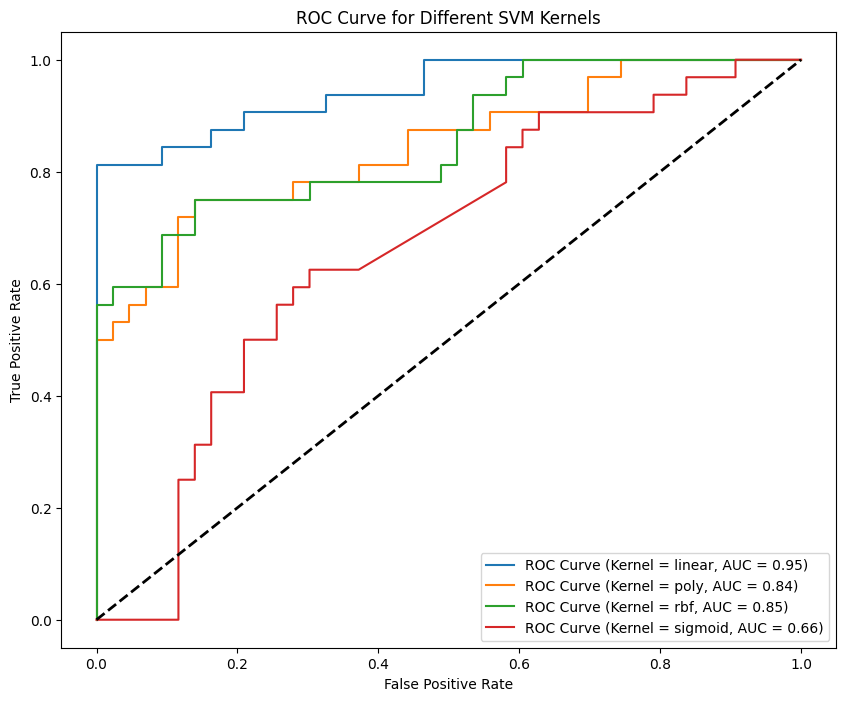

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# Try different SVM kernels for non-linear SVM models
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

plt.figure(figsize=(10, 8))

for kernel in svm_kernels:
    clf = svm.SVC(kernel=kernel, probability=True, C=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Kernel:", kernel)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  # Evaluation on the test data
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

    # Look at the mean squared error between the test data and prediction
    svm_mse = mean_squared_error(y_test, y_pred)

    # Calculate MAE for both models
    svm_mae = mean_absolute_error(y_test, y_pred)
    svm_r2 = r2_score(y_test, y_pred)

    # Print out evaluation metrics for both models
    print("Model {} : MSE = {}, MAE = {}, R2 = {}".format(kernel, svm_mse, svm_mae, svm_r2))
    print()

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Error rate
    error_rate = 1 - metrics.accuracy_score(y_test, y_pred)
    print("Error Rate:", error_rate)

    # False positive and false negative rates
    TN, FP, FN, TP = conf_matrix.ravel()
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)

    print("False Positive Rate:", FPR)
    print("False Negative Rate:", FNR)

    # Calculate probabilities
    y_probs = clf.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)

    # Print AUC
    #print("Thresholds:", thresholds)
    print("AUC:", roc_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'ROC Curve (Kernel = {kernel}, AUC = {roc_auc:.2f})')

    print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Dashed diagonal

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different SVM Kernels')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# try different SVM kernels for non-linear SVM models
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in svm_kernels:
  clf = svm.SVC(kernel=kernel, C=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print("Kernel:", kernel)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # evaluation on the test data
  print("Precision:",metrics.precision_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test, y_pred))

  # look at the mean squared error between the test data and prediciton
  svm_mse = mean_squared_error(y_test, y_pred)

  #calculate MAE for both models
  svm_mae = mean_absolute_error(y_test, y_pred)

  svm_r2 = r2_score(y_test, y_pred)

  #print out evaluation metrics for both models
  print("Model {} : MSE = {}, MAE = {}, R2 = {}".format(kernel, svm_mse, svm_mae, svm_r2))
  print()


Kernel: linear
Accuracy: 0.92
Precision: 1.0
Recall: 0.8125
Model linear : MSE = 0.08, MAE = 0.08, R2 = 0.6729651162790697

Kernel: poly
Accuracy: 0.76
Precision: 0.7916666666666666
Recall: 0.59375
Model poly : MSE = 0.24, MAE = 0.24, R2 = 0.018895348837209114

Kernel: rbf
Accuracy: 0.7866666666666666
Precision: 0.8636363636363636
Recall: 0.59375
Model rbf : MSE = 0.21333333333333335, MAE = 0.21333333333333335, R2 = 0.12790697674418594

Kernel: sigmoid
Accuracy: 0.3466666666666667
Precision: 0.2926829268292683
Recall: 0.375
Model sigmoid : MSE = 0.6533333333333333, MAE = 0.6533333333333333, R2 = -1.6707848837209305



## Model: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Cross validation for best hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("The best cross-validation accuracy is: {:.2f}".format(best_score))
print("The best parameters are: ", best_params)

The best cross-validation accuracy is: 0.95
The best parameters are:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
# Test the model
best_tree_model = grid_search.best_estimator_
best_tree_probabilities = best_tree_model.predict_proba(X_test)[:,1]
test_accuracy = best_tree_model.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_accuracy))

Test set accuracy: 0.92


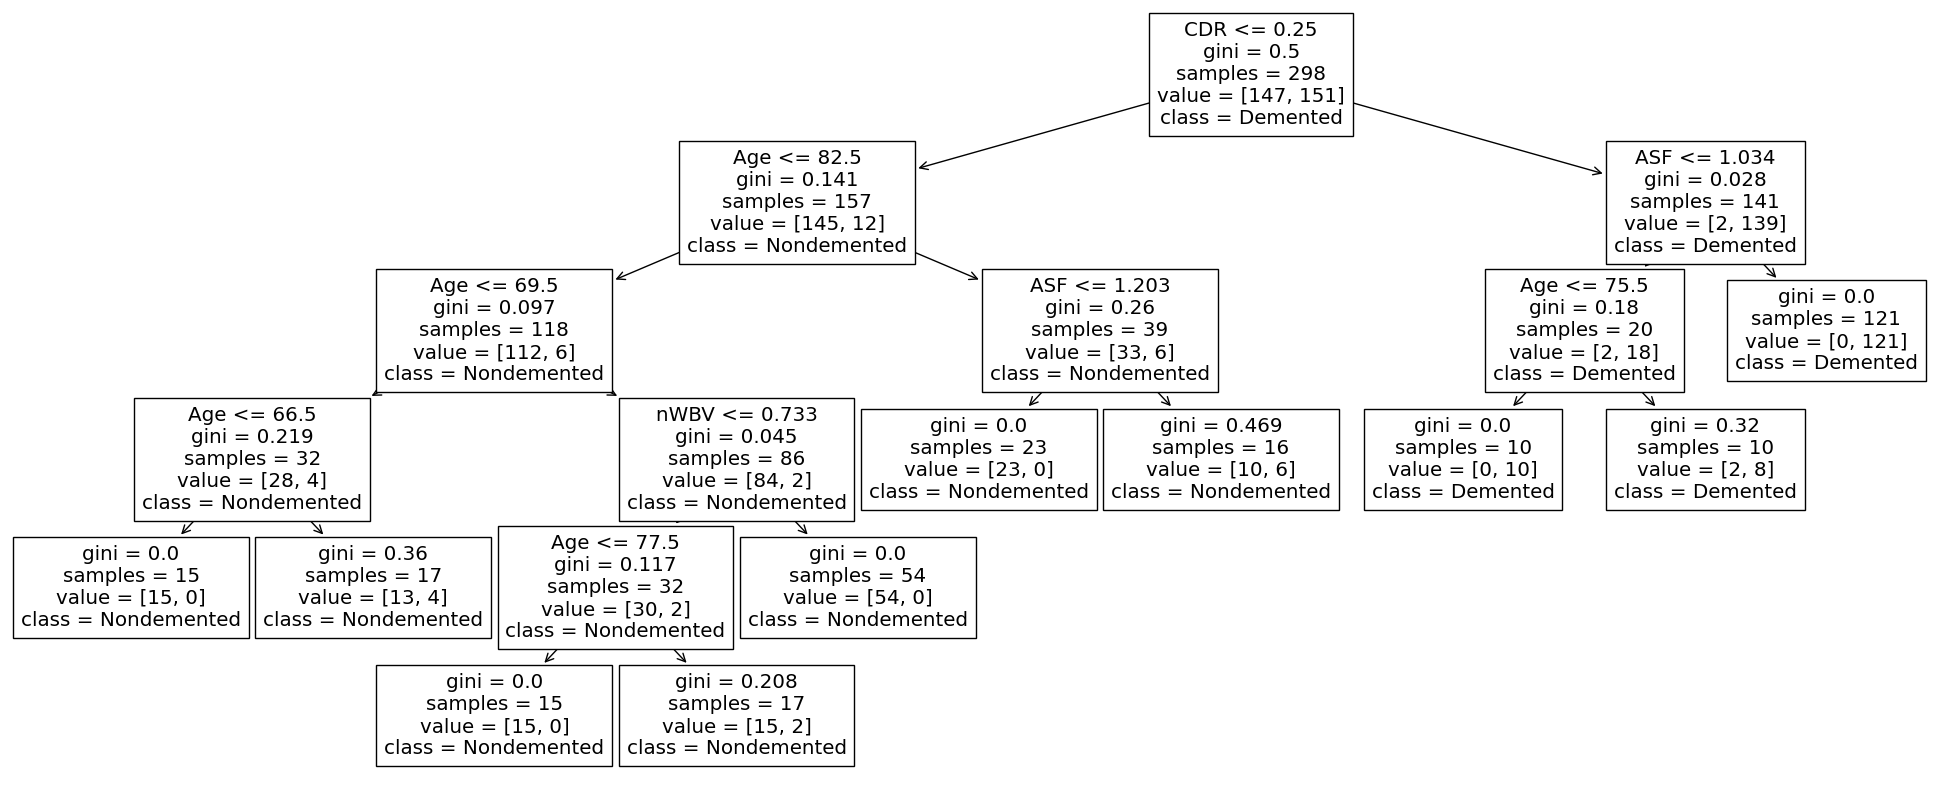

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizing the model
plt.figure(figsize=(25, 10))
feature_names = df.drop(columns=['Group']).columns.tolist()
plot_tree(best_tree_model, feature_names = feature_names, class_names = ["Nondemented", "Demented"])
plt.show()

## Model: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


estimators = [x for x in range(100, 2000, 50)]
criteria = ["gini", "entropy", "log_loss"]
depth = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
samples_split = [i for i in range(2, 20)]
samples_leaf = [i for i in range(2, 30)]
features = ['log2', 'sqrt']
bootstrap = [True, False]


random_grid = {'n_estimators': estimators,
               'criterion': criteria,
               'max_depth': depth,
               'min_samples_split': samples_split,
               'min_samples_leaf': samples_leaf,
               'max_features': features,
               'bootstrap': bootstrap}



model = RandomForestClassifier()
tuned_model = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3)
trained_tree = tuned_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

cross_valid_accuracy = tuned_model.best_score_
print("The best cross-validation accuracy is: {:.2f}".format(cross_valid_accuracy))

y_prediction = tuned_model.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Test set accuracy: " + str(accuracy))

tuned_params = tuned_model.best_params_
print("The best parameters are: " + str(tuned_params))

best_random_forest_model = tuned_model
best_forest_probabilities = tuned_model.predict_proba(X_test)[:,1]

## Model: Neural Networks

In [ ]:
# Load the data
data = pd.read_csv('alzheimer.csv')

Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, recall_score
from sklearn.pipeline import Pipeline

# Print statistics of each featureT
print(data.describe())

# Prepare the features and target
X = data.drop(['Group'], axis=1)
y = data['Group']

# Encode the target variable
y = y.map({'Nondemented': 0, 'Demented': 1, 'Converted': 1})

# Split the data into training+validation (80%) and testing (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              Age        EDUC         SES        MMSE         CDR  \
count  373.000000  373.000000  354.000000  371.000000  373.000000   
mean    77.013405   14.597855    2.460452   27.342318    0.290885   
std      7.640957    2.876339    1.134005    3.683244    0.374557   
min     60.000000    6.000000    1.000000    4.000000    0.000000   
25%     71.000000   12.000000    2.000000   27.000000    0.000000   
50%     77.000000   15.000000    2.000000   29.000000    0.000000   
75%     82.000000   16.000000    3.000000   30.000000    0.500000   
max     98.000000   23.000000    5.000000   30.000000    2.000000   

              eTIV        nWBV         ASF  
count   373.000000  373.000000  373.000000  
mean   1488.128686    0.729568    1.195461  
std     176.139286    0.037135    0.138092  
min    1106.000000    0.644000    0.876000  
25%    1357.000000    0.700000    1.099000  
50%    1470.000000    0.729000    1.194000  
75%    1597.000000    0.756000    1.293000  
max    2004.000000

Model Definitions

In [ ]:
# Create a pipeline for preprocessing, imputation, and model training
def create_pipeline(hidden_layers, alpha=0.0001, learning_rate_init=0.001):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
            ('cat_mf', OneHotEncoder(drop='first'), ['M/F']),
            ('cat_ses', OrdinalEncoder(), ['SES'])
        ])

    return Pipeline([
        ('preprocessor', preprocessor),
        ('imputer', SimpleImputer(strategy='mean')),
        ('mlp', MLPClassifier(hidden_layer_sizes=hidden_layers,
                              activation='relu',
                              solver='adam',
                              alpha=alpha,
                              learning_rate_init=learning_rate_init,
                              max_iter=1000,
                              random_state=42))
    ])

# Define different models
models = {
    'Small': [(10,)],
    'Medium': [(20, 10)],
    'Large': [(30, 20, 10)],
    'Very Large': [(50, 30, 20, 10)],
    'Extra Large': [(100, 50, 30, 20, 10)]
}

# Define regularization types and constants
regularizations = {
    'No regularization': 0.0,
    'L2 (Ridge) - weak': 0.0001,
    'L2 (Ridge) - strong': 0.001,
    'L1 (Lasso) - weak': 0.0001,
    'L1 (Lasso) - strong': 0.001,
}

# Learning rates
learning_rates = [0.001, 0.01, 0.1]


Model Evaluation

Small - No regularization - LR 0.001: Mean accuracy = 0.9598 (+/- 0.0169)
Small - No regularization - LR 0.01: Mean accuracy = 0.9532 (+/- 0.0220)
Small - No regularization - LR 0.1: Mean accuracy = 0.9497 (+/- 0.0212)
Small - L2 (Ridge) - weak - LR 0.001: Mean accuracy = 0.9598 (+/- 0.0169)
Small - L2 (Ridge) - weak - LR 0.01: Mean accuracy = 0.9565 (+/- 0.0225)
Small - L2 (Ridge) - weak - LR 0.1: Mean accuracy = 0.9598 (+/- 0.0225)
Small - L2 (Ridge) - strong - LR 0.001: Mean accuracy = 0.9598 (+/- 0.0169)
Small - L2 (Ridge) - strong - LR 0.01: Mean accuracy = 0.9565 (+/- 0.0168)
Small - L2 (Ridge) - strong - LR 0.1: Mean accuracy = 0.9363 (+/- 0.0266)
Small - L1 (Lasso) - weak - LR 0.001: Mean accuracy = 0.9598 (+/- 0.0169)
Small - L1 (Lasso) - weak - LR 0.01: Mean accuracy = 0.9565 (+/- 0.0225)
Small - L1 (Lasso) - weak - LR 0.1: Mean accuracy = 0.9598 (+/- 0.0225)
Small - L1 (Lasso) - strong - LR 0.001: Mean accuracy = 0.9598 (+/- 0.0169)
Small - L1 (Lasso) - strong - LR 0.01: Mea

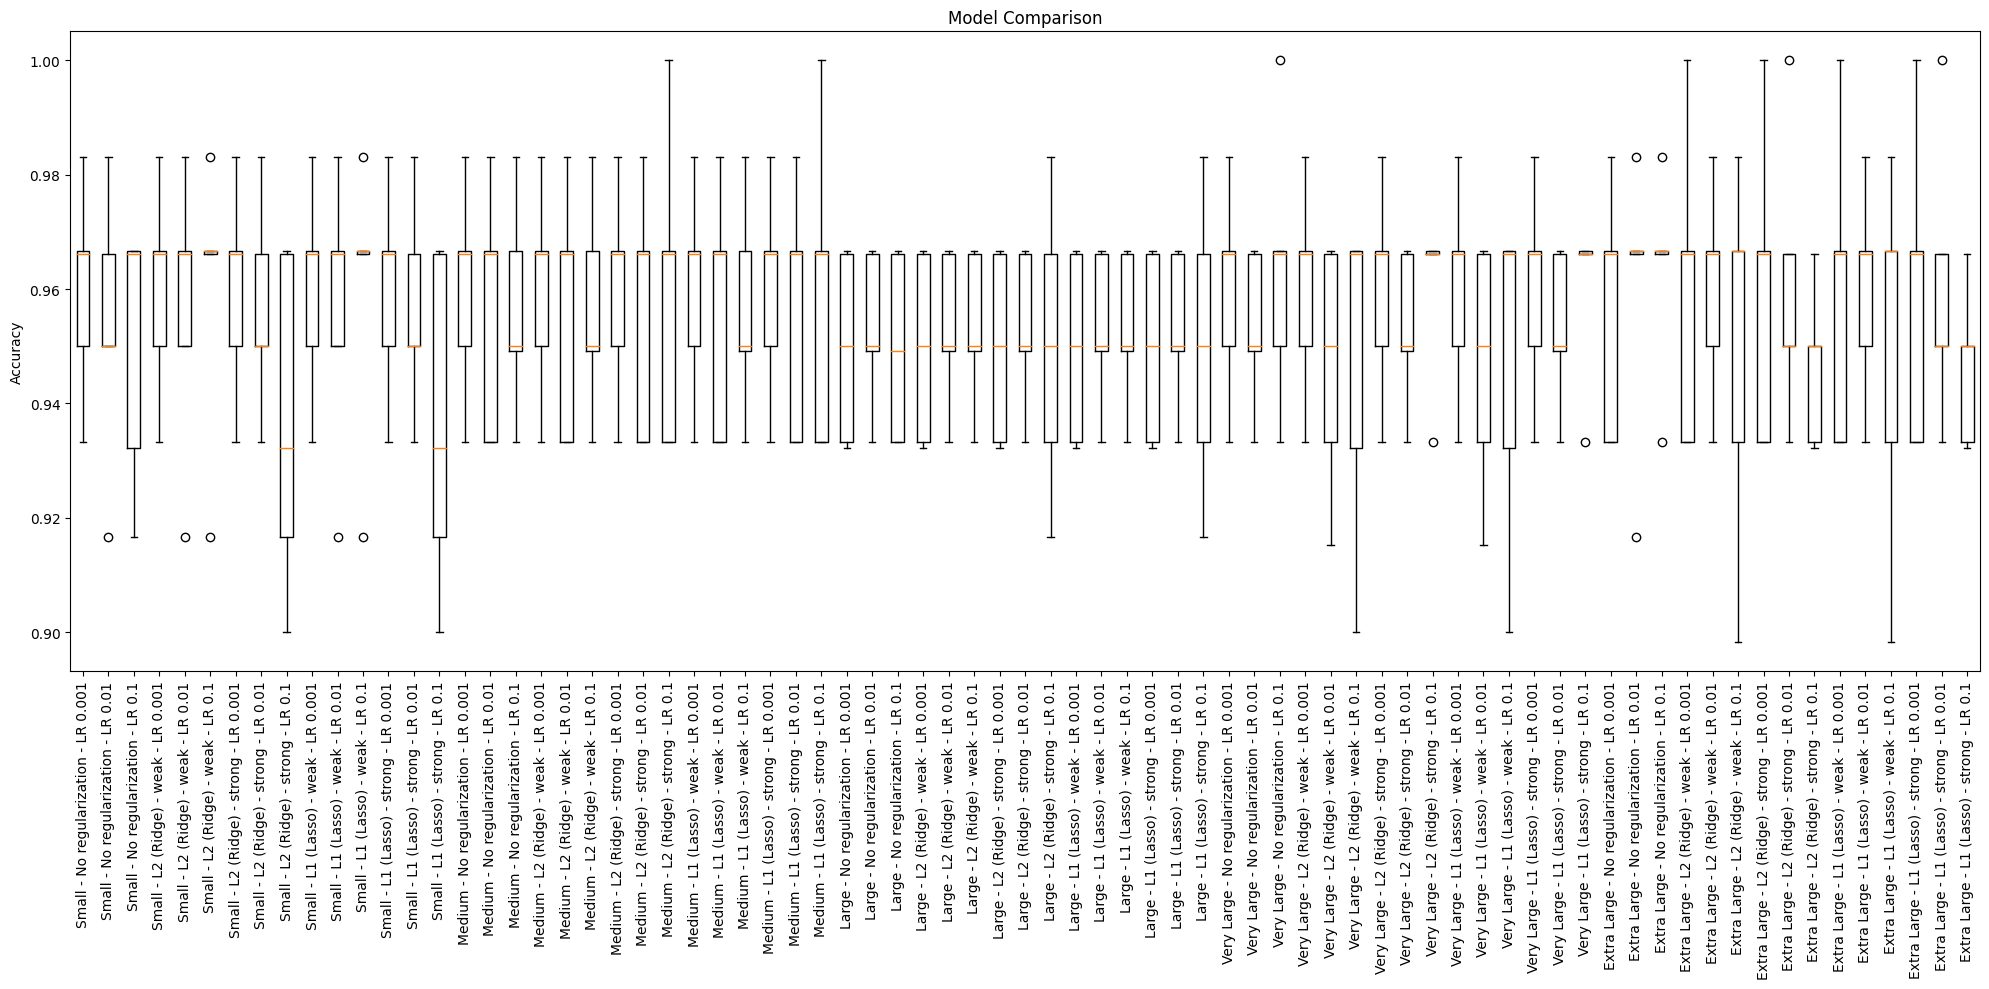

In [ ]:
# Prepare K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train and validate models
results = {}

for model_size, hidden_layers in models.items():
    for reg_name, alpha in regularizations.items():
        for lr in learning_rates:
            model_name = f"{model_size} - {reg_name} - LR {lr}"
            model = create_pipeline(hidden_layers[0], alpha=alpha, learning_rate_init=lr)
            scores = cross_val_score(model, X_train_val, y_train_val, cv=kf)
            results[model_name] = scores

# Compare results
for name, scores in results.items():
    print(f"{name}: Mean accuracy = {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

# Visualize results
plt.figure(figsize=(20, 10))
plt.boxplot(list(results.values()), labels=list(results.keys()))
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Model Selection

In [ ]:
# Choose the best model
best_model_name = max(results, key=lambda k: np.mean(results[k]))
print(f"\nBest model: {best_model_name}")

# Extract parameters from the best model name
parts = best_model_name.split(' - ')
size = parts[0]
lr = float(parts[-1].split()[-1])
reg = ' - '.join(parts[1:-1])

alpha = regularizations[reg.strip()]
hidden_layers = models[size][0]


# Create and train the best model
best_model = create_pipeline(hidden_layers, alpha=alpha, learning_rate_init=lr)
best_model.fit(X_train_val, y_train_val)

# Make predictions on the test set
y_pred = best_model.predict(X_test)


Best model: Very Large - No regularization - LR 0.1


Model Metrics


Test Results:
Accuracy: 0.9067

Confusion Matrix:
[[32  0]
 [ 7 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.84      0.91        43

    accuracy                           0.91        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.92      0.91      0.91        75


Sensitivity (Recall): 0.8372


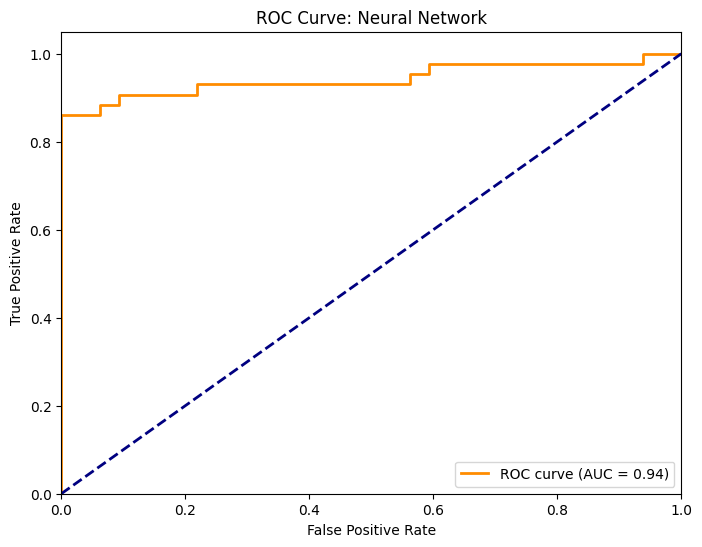


AUC Score: 0.9426


In [ ]:

# Print the test results
print("\nTest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print sensitivity (recall)
sensitivity = recall_score(y_test, y_pred)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")

# Get predicted probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Neural Network')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"\nAUC Score: {roc_auc:.4f}")

Interpreting Data

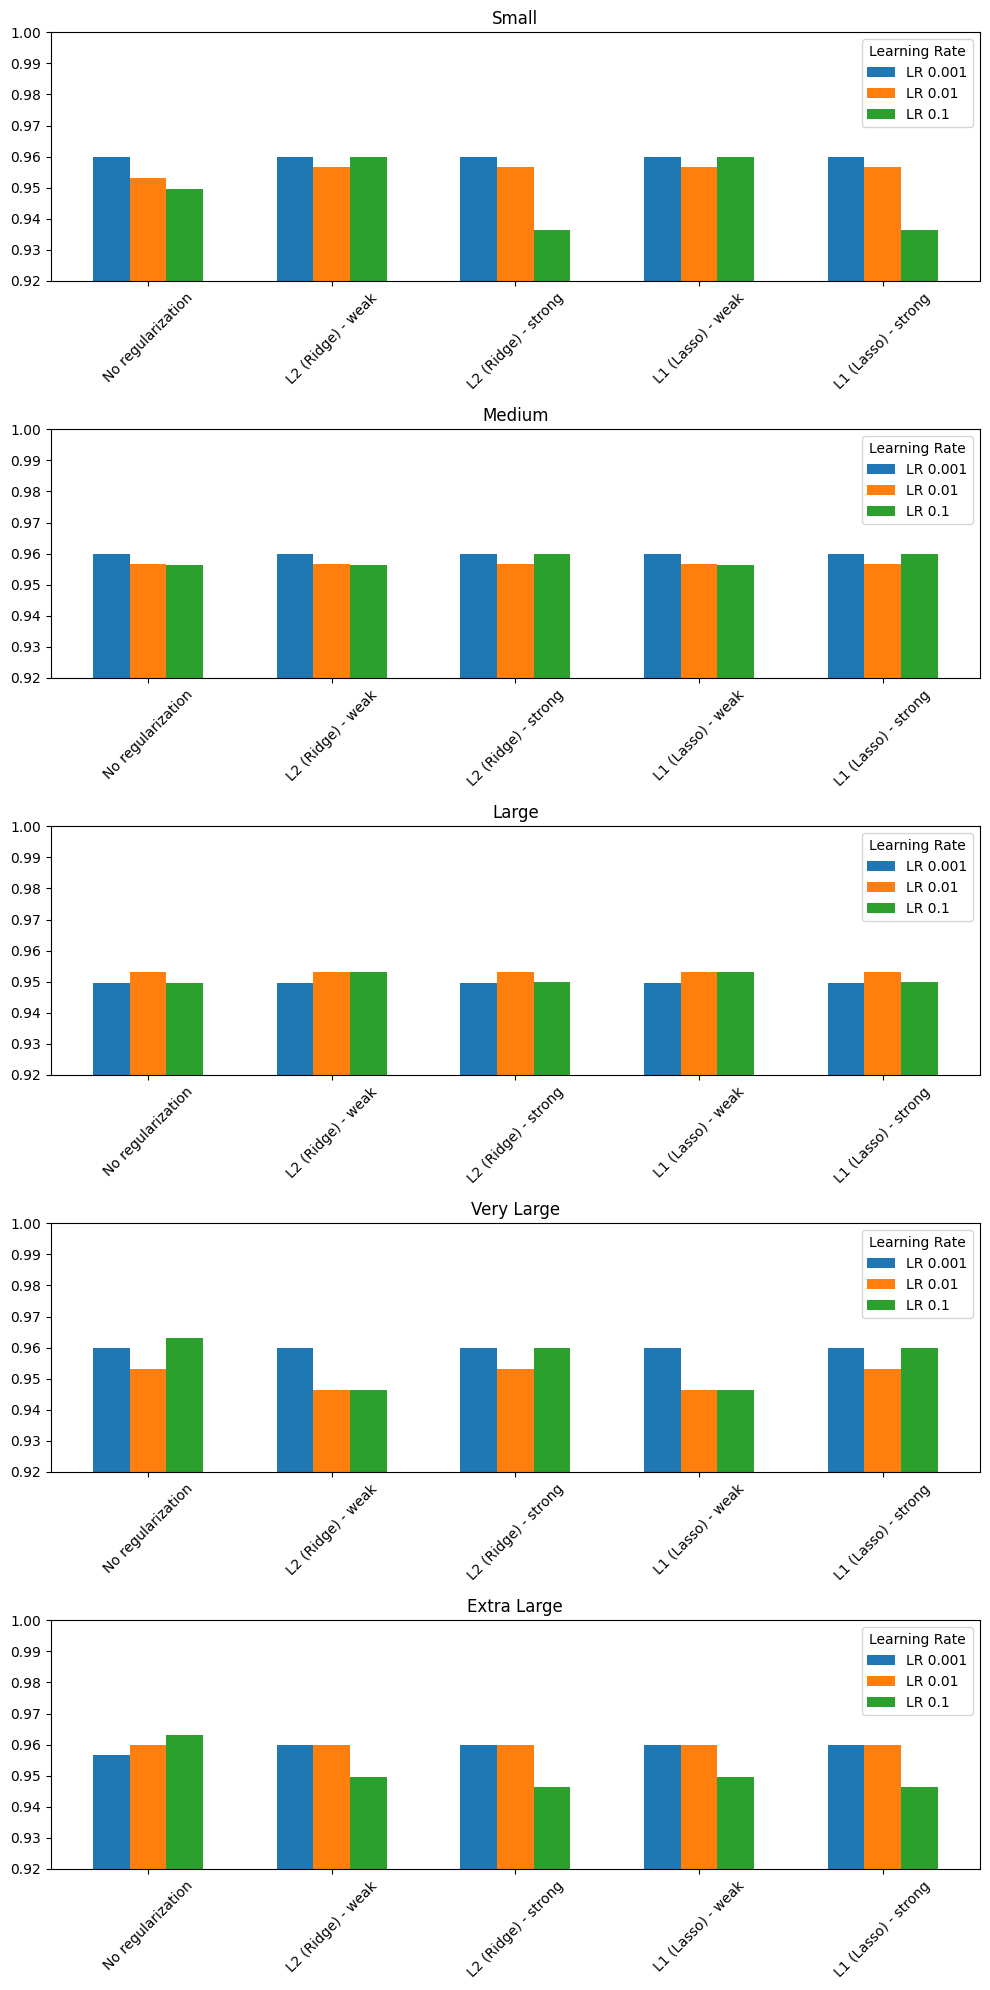

In [ ]:
# Data preparation
model_sizes = ['Small', 'Medium', 'Large', 'Very Large', 'Extra Large']
learning_rates = [0.001, 0.01, 0.1]
regularizations = ['No regularization', 'L2 (Ridge) - weak', 'L2 (Ridge) - strong', 'L1 (Lasso) - weak', 'L1 (Lasso) - strong']

# Create a 3D numpy array to store the accuracies
accuracies = np.array([
    [[0.9598, 0.9532, 0.9497],
     [0.9598, 0.9565, 0.9598],
     [0.9598, 0.9565, 0.9363],
     [0.9598, 0.9565, 0.9598],
     [0.9598, 0.9565, 0.9363]],

    [[0.9598, 0.9565, 0.9564],
     [0.9598, 0.9565, 0.9564],
     [0.9598, 0.9565, 0.9599],
     [0.9598, 0.9565, 0.9564],
     [0.9598, 0.9565, 0.9599]],

    [[0.9497, 0.9531, 0.9497],
     [0.9497, 0.9531, 0.9531],
     [0.9497, 0.9531, 0.9498],
     [0.9497, 0.9531, 0.9531],
     [0.9497, 0.9531, 0.9498]],

    [[0.9598, 0.9531, 0.9632],
     [0.9598, 0.9463, 0.9463],
     [0.9598, 0.9531, 0.9598],
     [0.9598, 0.9463, 0.9463],
     [0.9598, 0.9531, 0.9598]],

    [[0.9565, 0.9598, 0.9632],
     [0.9599, 0.9598, 0.9496],
     [0.9599, 0.9599, 0.9463],
     [0.9599, 0.9598, 0.9496],
     [0.9599, 0.9599, 0.9463]]
])

# Define the labels
model_labels = ['Small', 'Medium', 'Large', 'Very Large', 'Extra Large']
reg_labels = ['No regularization', 'L2 (Ridge) - weak', 'L2 (Ridge) - strong', 'L1 (Lasso) - weak', 'L1 (Lasso) - strong']
lr_labels = ['LR 0.001', 'LR 0.01', 'LR 0.1']

# Create the figure and axis
fig, ax = plt.subplots(5, 1, figsize=(10, 20))


# Set the x-axis positions for each regularization technique
x = np.arange(len(reg_labels))

# Set the width of each bar
width = 0.2

# Iterate over the models
for i, model in enumerate(model_labels):
    for j, lr in enumerate(lr_labels):
        ax[i].bar(x + j * width, accuracies[i, :, j], width, label=lr)
    ax[i].set_title(model)
    ax[i].set_xticks(x + width)
    ax[i].set_xticklabels(reg_labels, rotation=45)
    ax[i].set_ylim(0.92, 1)
    ax[i].legend(title='Learning Rate')  # Add a legend
# Layout so plots do not overlap
fig.tight_layout()

fig.savefig('bargraph.png')
plt.show()


##**EVALUATING, VISUALIZING, & COMPARING**
After finding all the results and accuracy scores of our data, we will configure the models into confusion matrices and review classifcation reports, as well as see visualizations to see where certain models excell, and others do not.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
def ConfusionMatrix(model):
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Test Accuracy:", test_accuracy)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

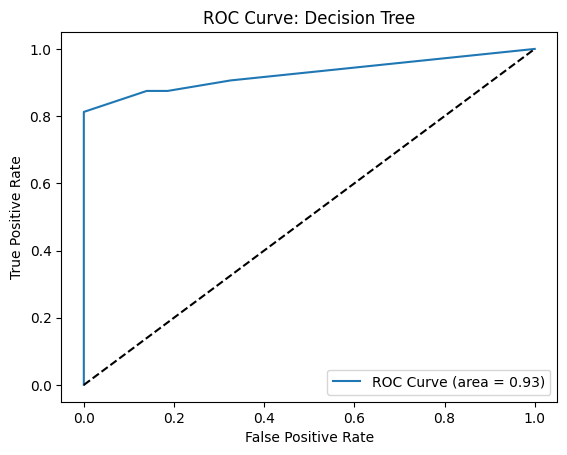

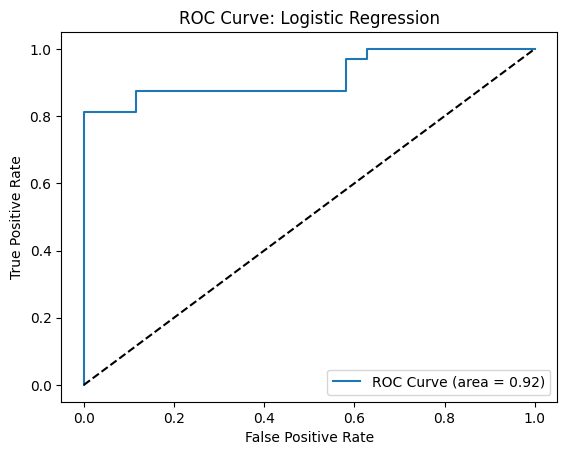

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc(probabilities, model_name, y_true=y_test):

  fpr, tpr, thresholds = roc_curve(y_true, probabilities)
  roc_auc = roc_auc_score(y_true, probabilities)

  plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve: ' + model_name)
  plt.legend(loc="lower right")
  plt.show()


#ROC Curves
#plot_roc(best_forest_probabilities, "Random Forest")
plot_roc(best_tree_probabilities, "Decision Tree")
plot_roc(best_log_probabilities, "Logistic Regression")

In [ ]:
#example:
ConfusionMatrix(best_log_model)
ConfusionMatrix(best_tree_model)


Test Accuracy: 0.92
Confusion Matrix:
 [[43  0]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.90        32

    accuracy                           0.92        75
   macro avg       0.94      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75

Test Accuracy: 0.9333333333333333
Confusion Matrix:
 [[41  2]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.94      0.91      0.92        32

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



In [ ]:
ConfusionMatrix(best_random_forest_model)

Test Accuracy: 0.92
Confusion Matrix:
 [[43  0]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.90        32

    accuracy                           0.92        75
   macro avg       0.94      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75

